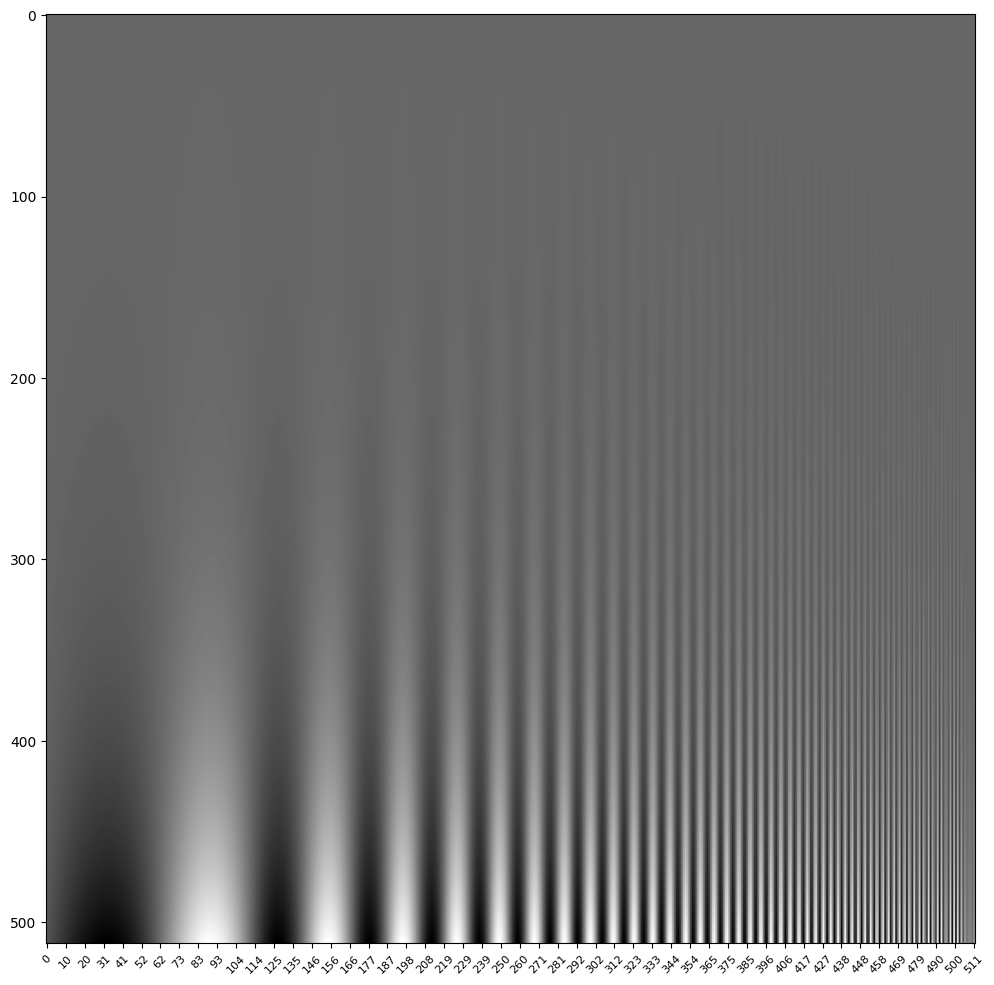

k1: 3.485981584065905, k2: 0.009012074727961039, k3: 0.01171875


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir dimensiones de la imagen
width, height = 512, 512
n = 200  # Periodo inicial aproximado

# Cálculo de k1 y k2
def calculate_k1_k2(width, n):
    k2 = np.log(np.pi / (2 * np.pi / n)) / (width - 1)
    k1 = (2 * np.pi / n) / k2
    return k1, k2

k1, k2 = calculate_k1_k2(width, n)

# Crear matrices x e y
x = np.linspace(0, width - 1, width)
y = np.linspace(0, height - 1, height)
X, Y = np.meshgrid(x, y)

# Definir la función de frecuencia exponencial
def f(x, k1, k2):
    return k1 * np.exp(k2 * x)

# Definir la onda senoidal
def h(x, k1, k2):
    return 0.2 + np.sin(f(x, k1, k2))

# Definir la atenuación en el eje y (invertida para corregir la imagen espejada)
def g(y, k3):
    return np.exp(-k3 * (height - 1 - y))  # Inversión vertical

# Calcular k3 para la atenuación
def calculate_k3(height):
    # Ajuste para obtener una buena atenuación
    k3 = 3 / (height / 2)  # Ajuste manual basado en el tamaño de la imagen
    return k3

k3 = calculate_k3(height)

# Crear la imagen
wave = h(X, k1, k2)
attenuation = g(Y, k3)
Z = wave * attenuation

# Normalizar la imagen para asegurar que los valores estén en el rango [0, 1]
Z = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))

# Mostrar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(Z, cmap='gray', aspect='equal', vmin=0, vmax=1)

# Ajustar los ticks en el eje x
num_ticks = 50  # Ajustar según el número de ticks deseados
x_ticks = np.linspace(0, width - 1, num_ticks)
x_labels = [f'{int(tick)}' for tick in x_ticks]  # Etiquetas como enteros
plt.xticks(x_ticks, x_labels, fontsize=8, rotation=45)  # Ajustar tamaño de fuente si es necesario

plt.tight_layout()
plt.show()

# Mostrar parámetros para verificación
print(f"k1: {k1}, k2: {k2}, k3: {k3}")
